In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

In [3]:
from trader_factory import build_active_IBridgePy_plus

In [4]:
from IBridgePy.IbridgepyTools import symbol

In [5]:
t = build_active_IBridgePy_plus('DU1868499')  # Build an active trader to get connected to Interactive Brokers

In [6]:
hist = t.request_historical_data(symbol('SPY'), '1 day', '1 Y')  # Get historical data. Return is a pandas.DataFrame

In [7]:
hist  # print hist to show it

,open,high,low,close,volume
2019-12-26,321.66,322.94,321.64,322.94,185553
2019-12-27,323.74,323.80,322.28,322.86,268298
2019-12-30,322.96,323.10,320.55,321.08,353546
2019-12-31,320.52,322.13,320.15,321.86,310433
2020-01-02,323.54,324.87,322.53,324.87,403133
...,...,...,...,...,...
2020-12-17,371.94,372.46,371.05,372.24,287860
2020-12-18,370.97,371.15,367.02,369.18,542187
2020-12-21,364.97,373.00,362.03,367.86,628768
2020-12-22,368.21,368.34,366.03,367.24,317473


In [8]:
hist.columns  # print column names

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [9]:
hist.index  # print index

Index([2019-12-26, 2019-12-27, 2019-12-30, 2019-12-31, 2020-01-02, 2020-01-03,
       2020-01-06, 2020-01-07, 2020-01-08, 2020-01-09,
       ...
       2020-12-10, 2020-12-11, 2020-12-14, 2020-12-15, 2020-12-16, 2020-12-17,
       2020-12-18, 2020-12-21, 2020-12-22, 2020-12-23],
      dtype='object', length=252)

In [10]:
hist['open']  # print out a column

2019-12-26    321.66
2019-12-27    323.74
2019-12-30    322.96
2019-12-31    320.52
2020-01-02    323.54
               ...  
2020-12-17    371.94
2020-12-18    370.97
2020-12-21    364.97
2020-12-22    368.21
2020-12-23    368.26
Name: open, Length: 252, dtype: float64

In [11]:
hist.iloc[0]  # print out 1st row

open         321.66
high         322.94
low          321.64
close        322.94
volume    185553.00
Name: 2019-12-26, dtype: float64

In [12]:
hist.iloc[-1]  # print out the last row

open         368.26
high         369.62
low          367.39
close        367.57
volume    282032.00
Name: 2020-12-23, dtype: float64

In [13]:
hist.iloc[0]['open']  # print out open price of the 1st row

321.66

In [14]:
type(hist.index[-1])  # print out the data type of index

datetime.date

In [15]:
import datetime as dt
hist.loc[dt.date(2020,12,15)]  # print out the prices of Dec 15th 2020

open         367.40
high         369.59
low          365.92
close        369.59
volume    348842.00
Name: 2020-12-15, dtype: float64

In [16]:
hist['close_yesterday'] = hist['close'].shift(1)  # add a new column, call it "close_yesterday"

In [17]:
hist

,open,high,low,close,volume,close_yesterday
2019-12-26,321.66,322.94,321.64,322.94,185553,NaN
2019-12-27,323.74,323.80,322.28,322.86,268298,322.94
2019-12-30,322.96,323.10,320.55,321.08,353546,322.86
2019-12-31,320.52,322.13,320.15,321.86,310433,321.08
2020-01-02,323.54,324.87,322.53,324.87,403133,321.86
...,...,...,...,...,...,...
2020-12-17,371.94,372.46,371.05,372.24,287860,370.17
2020-12-18,370.97,371.15,367.02,369.18,542187,372.24
2020-12-21,364.97,373.00,362.03,367.86,628768,369.18
2020-12-22,368.21,368.34,366.03,367.24,317473,367.86


In [18]:
hist['yield_yesterday'] = (hist['close'] - hist['close_yesterday']) / hist['close_yesterday']

In [19]:
hist  # a column of yield_yesterday is added.

,open,high,low,close,volume,close_yesterday,yield_yesterday
2019-12-26,321.66,322.94,321.64,322.94,185553,NaN,NaN
2019-12-27,323.74,323.80,322.28,322.86,268298,322.94,-0.000248
2019-12-30,322.96,323.10,320.55,321.08,353546,322.86,-0.005513
2019-12-31,320.52,322.13,320.15,321.86,310433,321.08,0.002429
2020-01-02,323.54,324.87,322.53,324.87,403133,321.86,0.009352
...,...,...,...,...,...,...,...
2020-12-17,371.94,372.46,371.05,372.24,287860,370.17,0.005592
2020-12-18,370.97,371.15,367.02,369.18,542187,372.24,-0.008221
2020-12-21,364.97,373.00,362.03,367.86,628768,369.18,-0.003575
2020-12-22,368.21,368.34,366.03,367.24,317473,367.86,-0.001685


In [20]:
hist['yield_tomorrow'] = hist['yield_yesterday'].shift(-1)

In [21]:
hist  # A column of yield_tomorrow is added.

,open,high,low,close,volume,close_yesterday,yield_yesterday,yield_tomorrow
2019-12-26,321.66,322.94,321.64,322.94,185553,NaN,NaN,-0.000248
2019-12-27,323.74,323.80,322.28,322.86,268298,322.94,-0.000248,-0.005513
2019-12-30,322.96,323.10,320.55,321.08,353546,322.86,-0.005513,0.002429
2019-12-31,320.52,322.13,320.15,321.86,310433,321.08,0.002429,0.009352
2020-01-02,323.54,324.87,322.53,324.87,403133,321.86,0.009352,-0.007572
...,...,...,...,...,...,...,...,...
2020-12-17,371.94,372.46,371.05,372.24,287860,370.17,0.005592,-0.008221
2020-12-18,370.97,371.15,367.02,369.18,542187,372.24,-0.008221,-0.003575
2020-12-21,364.97,373.00,362.03,367.86,628768,369.18,-0.003575,-0.001685
2020-12-22,368.21,368.34,366.03,367.24,317473,367.86,-0.001685,0.000899


In [22]:
hist.dropna(inplace=True)

In [24]:
hist  # NaN rows are dropped from hist

,open,high,low,close,volume,close_yesterday,yield_yesterday,yield_tomorrow
2019-12-27,323.74,323.80,322.28,322.86,268298,322.94,-0.000248,-0.005513
2019-12-30,322.96,323.10,320.55,321.08,353546,322.86,-0.005513,0.002429
2019-12-31,320.52,322.13,320.15,321.86,310433,321.08,0.002429,0.009352
2020-01-02,323.54,324.87,322.53,324.87,403133,321.86,0.009352,-0.007572
2020-01-03,321.14,323.64,321.10,322.41,473577,324.87,-0.007572,0.003815
...,...,...,...,...,...,...,...,...
2020-12-16,369.82,371.16,368.86,370.17,330969,369.59,0.001569,0.005592
2020-12-17,371.94,372.46,371.05,372.24,287860,370.17,0.005592,-0.008221
2020-12-18,370.97,371.15,367.02,369.18,542187,372.24,-0.008221,-0.003575
2020-12-21,364.97,373.00,362.03,367.86,628768,369.18,-0.003575,-0.001685


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [26]:
hist.shape  # There are 250 rows and 8 columns

(250, 8)

In [27]:
# Use machine learning package and build a linear regression model to predit tomorrow's price.
x = hist['yield_yesterday']
y = hist['yield_tomorrow']
model = LinearRegression()
model.fit(hist.loc[:, ['yield_yesterday']], y)
print(model.coef_)
print(model.intercept_)

[-0.3148713]
0.00097896558154961


In [28]:
# Create a column of predicted prices using the linear regression model
preds = model.predict(hist.loc[:, ["yield_yesterday"]])

In [29]:
preds

array([ 1.05696677e-03,  2.71492205e-03,  2.14048394e-04, -1.96567681e-03,
        3.36325280e-03, -2.22274124e-04,  1.86431004e-03, -6.99151199e-04,
       -1.15608404e-03,  1.88507003e-03, -1.18649358e-03,  1.45902549e-03,
        2.67392032e-04, -1.64024474e-03, -1.08226831e-06,  1.59552332e-03,
        9.40949126e-04,  6.17852850e-04,  3.77912934e-03,  6.02617709e-03,
       -2.32061306e-03,  1.23903854e-03, -4.29056246e-05,  6.69638565e-03,
       -1.36008392e-03, -3.82007243e-03, -2.65718261e-03, -8.05064219e-05,
        2.65712268e-03, -1.37166902e-03,  4.33294040e-04, -1.04967487e-03,
        1.31490793e-03,  4.74513853e-04,  1.79039339e-03, -5.26521859e-04,
        2.27254926e-03,  4.22159326e-03,  1.14218003e-02,  1.05202241e-02,
        2.13713603e-03,  1.51203763e-02,  2.30190975e-03, -1.26570255e-02,
        9.99449816e-03, -1.22560323e-02,  1.14458245e-02,  6.18413809e-03,
        2.55686926e-02, -1.53140136e-02,  1.63284227e-02,  3.11049734e-02,
       -2.59382090e-02,  

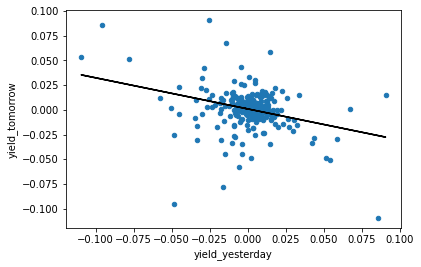

In [30]:
# Draw a scatter plot.
# The scatter dots are yield_tomorrow vs. yield_yesterday
# The black line is drawn to visualize the trend
hist.plot.scatter(x = "yield_yesterday", y = "yield_tomorrow")
plt.plot(hist['yield_yesterday'], preds, color="black")

In [31]:
import os
os.getcwd()

'/Users/huiliu/Documents/YellowstoneIBridgePy/tutorials'

In [33]:
# Save hist to local file baseProject/tutorials/myHist.csv
hist.to_csv(os.path.join(os.getcwd(), 'myHist.csv'))

In [34]:
import pandas as pd
# Read hist from local file, 
newHist = pd.read_csv(os.path.join(os.getcwd(), 'myHist.csv'), header=0)

In [35]:
newHist

,Unnamed: 0,open,high,low,close,volume,close_yesterday,yield_yesterday,yield_tomorrow
0,2019-12-27,323.74,323.80,322.28,322.86,268298,322.94,-0.000248,-0.005513
1,2019-12-30,322.96,323.10,320.55,321.08,353546,322.86,-0.005513,0.002429
2,2019-12-31,320.52,322.13,320.15,321.86,310433,321.08,0.002429,0.009352
3,2020-01-02,323.54,324.87,322.53,324.87,403133,321.86,0.009352,-0.007572
4,2020-01-03,321.14,323.64,321.10,322.41,473577,324.87,-0.007572,0.003815
...,...,...,...,...,...,...,...,...,...
245,2020-12-16,369.82,371.16,368.86,370.17,330969,369.59,0.001569,0.005592
246,2020-12-17,371.94,372.46,371.05,372.24,287860,370.17,0.005592,-0.008221
247,2020-12-18,370.97,371.15,367.02,369.18,542187,372.24,-0.008221,-0.003575
248,2020-12-21,364.97,373.00,362.03,367.86,628768,369.18,-0.003575,-0.001685


In [36]:
newHist.set_index('Unnamed: 0')

,open,high,low,close,volume,close_yesterday,yield_yesterday,yield_tomorrow
Unnamed: 0,,,,,,,,
2019-12-27,323.74,323.80,322.28,322.86,268298,322.94,-0.000248,-0.005513
2019-12-30,322.96,323.10,320.55,321.08,353546,322.86,-0.005513,0.002429
2019-12-31,320.52,322.13,320.15,321.86,310433,321.08,0.002429,0.009352
2020-01-02,323.54,324.87,322.53,324.87,403133,321.86,0.009352,-0.007572
2020-01-03,321.14,323.64,321.10,322.41,473577,324.87,-0.007572,0.003815
...,...,...,...,...,...,...,...,...
2020-12-16,369.82,371.16,368.86,370.17,330969,369.59,0.001569,0.005592
2020-12-17,371.94,372.46,371.05,372.24,287860,370.17,0.005592,-0.008221
2020-12-18,370.97,371.15,367.02,369.18,542187,372.24,-0.008221,-0.003575
